![jupyter](./tasks/task2.png)

In [55]:
import numpy as np
import math
import random
import seaborn as sb
import matplotlib.pyplot as plt
from prettytable import PrettyTable

np.set_printoptions(precision=7, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [56]:
k = 8
p = 0.6
n = 180

print("Вариант 13\nk =", k, "\np =", p, "\nn =", n)

Вариант 13
k = 8 
p = 0.6 
n = 180


In [57]:
P = np.array([])
for i in range(k + 1):
    cur = math.comb(k, i) * p ** i * (1 - p) ** (k - i)
    P = np.append(P, cur)
    
U = np.array([])
s = 0
for i in P:
    s += i
    U = np.append(U, s)

print("Находим теоретический закон\n")
th = ['Значение СВ', 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = ['Вероятности']
td = np.append(td, np.around(P, 5))
td = np.append(td, "Кумулятивные вер-ти")
td = np.append(td, np.around(U, 5))
print_table(th, td)
print("\n")
print("Вероятности вычисляются по формуле Бернулли:\n p =", P)
print("\n")
print("Кумулятивные вероятности:\n u =", U)

Находим теоретический закон

+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+--------+
|     Значение СВ     |    0    |    1    |    2    |    3    |    4    |    5    |    6    |    7    |   8    |
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+--------+
|     Вероятности     | 0.00066 | 0.00786 | 0.04129 | 0.12386 | 0.23224 | 0.27869 | 0.20902 | 0.08958 | 0.0168 |
| Кумулятивные вер-ти | 0.00066 | 0.00852 | 0.04981 | 0.17367 | 0.40591 | 0.68461 | 0.89362 |  0.9832 |  1.0   |
+---------------------+---------+---------+---------+---------+---------+---------+---------+---------+--------+


Вероятности вычисляются по формуле Бернулли:
 p = [0.0006554 0.0078643 0.0412877 0.123863  0.2322432 0.2786918 0.2090189
 0.0895795 0.0167962]


Кумулятивные вероятности:
 u = [0.0006554 0.0085197 0.0498074 0.1736704 0.4059136 0.6846054 0.8936243
 0.9832038 1.       ]


In [58]:
y = np.array([])
for i in range(n):
    y = np.append(y, random.random())

x = np.array([])
for y_n in y:
    for i in range(U.size):
        if y_n < U[i]:
            x = np.append(x, i)
            break
            
frequency = np.array([])
for i in range(k + 1):
    frequency = np.append(frequency, np.count_nonzero(x == i))
    
relative_frequency = np.array([])
for i in range(frequency.size):
    relative_frequency = np.append(relative_frequency, frequency[i] / n) 
    
accumulated_frequency = np.array([])
s = 0
for i in relative_frequency:
    s += i
    accumulated_frequency = np.append(accumulated_frequency, s)
    
print("Моделируем вектор из n случайных чисел\n")
print("y = ", y)
print("\n")
print("По вектору y разыгрываем вектор x в соответствии с алгоритмом\n")
print("x = ", x.astype(int))
print("\n")
print("Строим статистический ряд (здесь n=180)\n")
th = ['Значение СВ', 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = ['Частоты']
td = np.append(td, frequency)
td = np.append(td, ['Относительные частоты'])
td = np.append(td, np.around(relative_frequency, 3))
td = np.append(td, ['Накопительные частоты'])
td = np.append(td, np.around(accumulated_frequency, 3))

print_table(th, td)

Моделируем вектор из n случайных чисел

y =  [0.7430117 0.0131937 0.2641287 0.6805061 0.4669953 0.2824088 0.7670211
 0.5419881 0.7512036 0.3826804 0.575476  0.2169679 0.7199178 0.9844199
 0.2300451 0.1119377 0.5418018 0.9623804 0.1032463 0.3804054 0.0453402
 0.994107  0.3923415 0.3229826 0.7679851 0.7086679 0.3936306 0.4782161
 0.5149101 0.2440556 0.6649177 0.8233195 0.5972178 0.8269096 0.9774578
 0.2413795 0.8825712 0.3449476 0.1474206 0.9045174 0.1153197 0.1582498
 0.9117441 0.6836176 0.6878929 0.382675  0.1993398 0.5453025 0.2743971
 0.1376975 0.8173508 0.2806923 0.2024272 0.4339194 0.6726711 0.6473608
 0.5672103 0.1248707 0.9509945 0.7103654 0.6609607 0.2912492 0.7967039
 0.0743767 0.1279769 0.2230869 0.1037165 0.3257206 0.1961282 0.6005775
 0.7305526 0.1883716 0.6201679 0.7417755 0.5244109 0.5455933 0.7542234
 0.5306046 0.3950252 0.6663366 0.2365113 0.2888259 0.1380154 0.5187399
 0.8493737 0.4772348 0.4946868 0.6910588 0.7237271 0.2485692 0.3767957
 0.7215686 0.7587811 0.4209413 0

Строим совмещенные графики


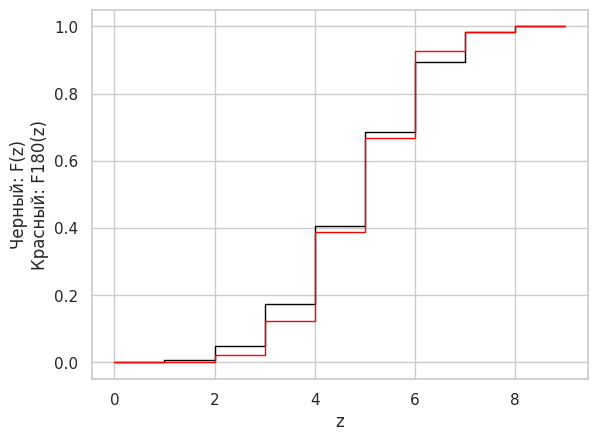

In [59]:
print("Строим совмещенные графики")
sb.set_style('whitegrid')
z = range(0, 10)
plt.step(z, [0.0] + U.tolist(), linewidth = 1.0, color='black')
plt.step(z, [0.0] + accumulated_frequency.tolist(), linewidth = 1.0, color='red')
plt.xlabel("z")
plt.ylabel("Черный: F(z)\nКрасный: F180(z)")
plt.show()

In [60]:
modul = np.array([0])
for i in range(k + 1):
    modul = np.append(modul, abs(accumulated_frequency[i] - U[i]))
    
print("Вычисление статистики Колмогорова для выборки из дискретного закона\n")
th = ['Интервалы', '(-inf,0]', '(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,+inf)']
td = ['Эмпирическая\nфункция\nраспределения\n', 0]
td = np.append(td, np.around(accumulated_frequency,4))
td = np.append(td, ['Теоретическая\nфункция\nраспределения\n'])
td = np.append(td, 0)
td = np.append(td, np.around(U, 4))
td = np.append(td, ['Модуль\nразности\n'])
td = np.append(td, np.around(modul, 4))

print_table(th, td)

print("Статистика Колмагорова:\n", np.amax(modul))

Вычисление статистики Колмогорова для выборки из дискретного закона

+---------------+----------+--------+--------+--------+--------+--------+--------+--------+--------+----------+
|   Интервалы   | (-inf,0] | (0,1]  | (1,2]  | (2,3]  | (3,4]  | (4,5]  | (5,6]  | (6,7]  | (7,8]  | (8,+inf) |
+---------------+----------+--------+--------+--------+--------+--------+--------+--------+--------+----------+
|  Эмпирическая |    0     |  0.0   |  0.0   | 0.0222 | 0.1222 | 0.3889 | 0.6667 | 0.9278 | 0.9833 |   1.0    |
|    функция    |          |        |        |        |        |        |        |        |        |          |
| распределения |          |        |        |        |        |        |        |        |        |          |
|               |          |        |        |        |        |        |        |        |        |          |
| Теоретическая |    0     | 0.0007 | 0.0085 | 0.0498 | 0.1737 | 0.4059 | 0.6846 | 0.8936 | 0.9832 |   1.0    |
|    функция    |          |       

In [61]:
print("Вычисление эмпирических и теоретических характеристик\n")

mn = x.mean()
m = sum(P[i] * i for i in range(k + 1))
D = sum((i - m) ** 2 * P[i] for i in range(k + 1))
S2 = 1/179 * sum((x[i] - mn) ** 2 for i in range(n))

print("Абсолютная величина разности выборочного среднего и теоретического мат ожидания мало\n", np.around(abs(mn-m), 5))
print("Отношение среднеквадратичных отклонений близко к единице\n", np.around(math.sqrt(S2/D), 5))
print("Следовательно, результаты моделирования можно признать удовлетворительными.")

Вычисление эмпирических и теоретических характеристик

Абсолютная величина разности выборочного среднего и теоретического мат ожидания мало
 0.08889
Отношение среднеквадратичных отклонений близко к единице
 0.88269
Следовательно, результаты моделирования можно признать удовлетворительными.
